In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet

In [3]:
def read_train():
    train_test =  fastparquet.ParquetFile("../input/train_test.parq").to_pandas()
    return train_test[train_test['istrain']] 

In [4]:
%time train =read_train()
train.shape 

CPU times: user 29.1 s, sys: 17.6 s, total: 46.8 s
Wall time: 46.8 s


(125497040, 15)

In [5]:
train.head()

date  istrain  item_nbr  onpromotion  store_nbr  unit_sales  \
index                                                                     
0     2013-01-01     True    103665           -1         25    2.079442   
1     2013-01-01     True    105574           -1         25    0.693147   
2     2013-01-01     True    105575           -1         25    1.098612   
3     2013-01-01     True    108079           -1         25    0.693147   
4     2013-01-01     True    108701           -1         25    0.693147   

       dcoilwtico  city  state  type  cluster  holiday  family  class  \
index                                                                   
0             NaN    20     13     3        1     True       5   2712   
1             NaN    20     13     3        1     True      12   1045   
2             NaN    20     13     3        1     True      12   1045   
3             NaN    20     13     3        1     True      12   1030   
4             NaN    20     13     3        1     True       9   2644   

       perishable  
index              
0               1  
1               0  
2               0  
3               0  
4               1

In [6]:
df=train[['date','store_nbr','item_nbr','unit_sales','dcoilwtico']]

In [7]:
del train

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
date          datetime64[ns]
store_nbr     int8
item_nbr      int32
unit_sales    float32
dcoilwtico    float32
dtypes: datetime64[ns](1), float32(2), int32(1), int8(1)
memory usage: 3.4 GB


In [11]:
df2=pd.DataFrame(df['date']+pd.Timedelta('16 days'))

In [10]:
s1=df[['date','unit_sales']].groupby('date').mean()['unit_sales']

In [11]:
s2=df[['date','dcoilwtico']].groupby('date').mean()['dcoilwtico']

In [13]:
df=pd.concat([s1,s2],1)
df.shape

(1684, 2)

In [15]:
df.corr()

unit_sales  dcoilwtico
unit_sales    1.000000    0.332857
dcoilwtico    0.332857    1.000000

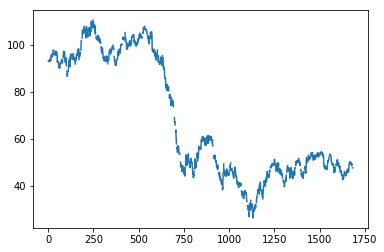

In [18]:
plt.plot(s2.values);

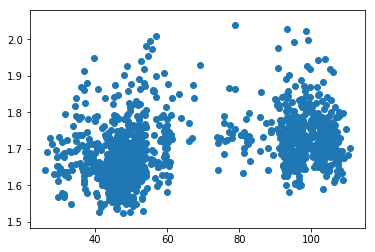

In [83]:
plt.scatter(s2.values,s1.values);

            unit_sales  dcoilwtico
unit_sales    1.000000    0.185177
dcoilwtico    0.185177    1.000000


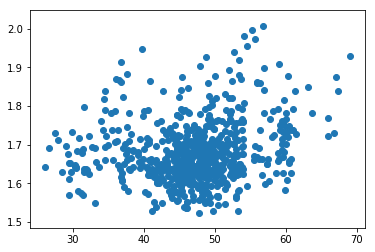

In [34]:
#df1=df.loc[df.index<pd.to_datetime('2015-06-24')]
df1=df.loc[df['dcoilwtico']< 70]
plt.scatter(df1['dcoilwtico'],df1['unit_sales']);
print df1.corr()

            unit_sales  dcoilwtico
unit_sales     1.00000    -0.07794
dcoilwtico    -0.07794     1.00000


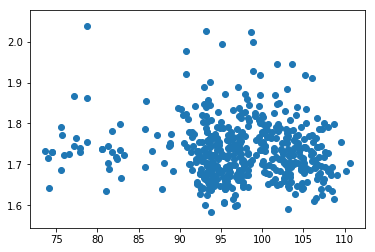

In [35]:
#df1=df.loc[df.index<pd.to_datetime('2015-06-24')]
df1=df.loc[df['dcoilwtico']> 70]
plt.scatter(df1['dcoilwtico'],df1['unit_sales']);
print df1.corr()

In [49]:
ds2=pd.DataFrame(np.diff(df['dcoilwtico']),index=df.index[1:],columns=['oil'])

In [51]:
df2=pd.concat([s1,ds2],1)

In [53]:
df2.corr()

unit_sales       oil
unit_sales    1.000000 -0.048228
oil          -0.048228  1.000000

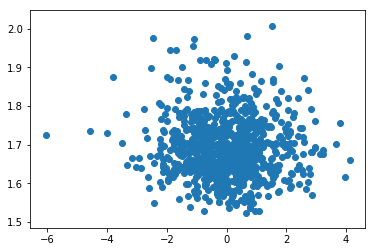

In [55]:
plt.scatter(df2['oil'],df2['unit_sales']);

In [67]:
def f(s,n):
    return s[n:]-s[:-n]

unit_sales       oil
unit_sales    1.000000 -0.104851
oil          -0.104851  1.000000

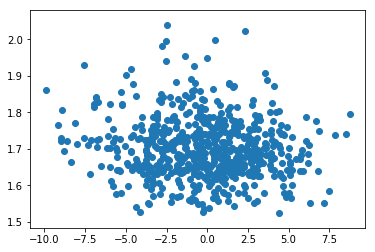

In [69]:
ds2=pd.DataFrame(f(df['dcoilwtico'].values,10),index=df.index[10:],columns=['oil'])
df2=pd.concat([s1,ds2],1)
plt.scatter(df2['oil'],df2['unit_sales']);
df2.corr()

unit_sales       oil
unit_sales    1.000000 -0.187155
oil          -0.187155  1.000000

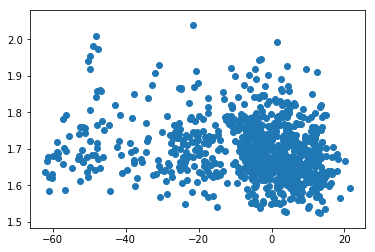

In [79]:
ds2=pd.DataFrame(f(df['dcoilwtico'].values,210),index=df.index[210:],columns=['oil'])
df2=pd.concat([s1,ds2],1)
plt.scatter(df2['oil'],df2['unit_sales']);
df2.corr()

unit_sales       oil
unit_sales    1.000000 -0.029616
oil          -0.029616  1.000000

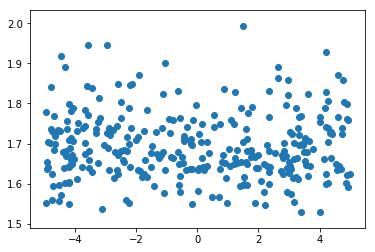

In [82]:
ds2=pd.DataFrame(f(df['dcoilwtico'].values,210),index=df.index[210:],columns=['oil'])
df2=pd.concat([s1,ds2],1)
df2=df2[(df2['oil']>-5) & (df2['oil']<5)]
plt.scatter(df2['oil'],df2['unit_sales']);
df2.corr()

In [9]:
import gc
gc.collect()

39642